In [16]:
import pandas as pd
car_df = pd.read_csv("car data.csv")
print(car_df.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [17]:
car_df.info()
car_df.describe()
car_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [18]:
# Create a new feature: Car Age
car_df['Car_Age'] = 2025 - car_df['Year']

# Drop irrelevant columns
car_df.drop(['Car_Name', 'Year'], axis=1, inplace=True)


In [19]:
# Use one-hot encoding for categorical variables
car_df = pd.get_dummies(car_df, drop_first=True)
car_df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [20]:
X = car_df.drop('Selling_Price', axis=1)
y = car_df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9594566919773236
RMSE: 0.9664050903676592


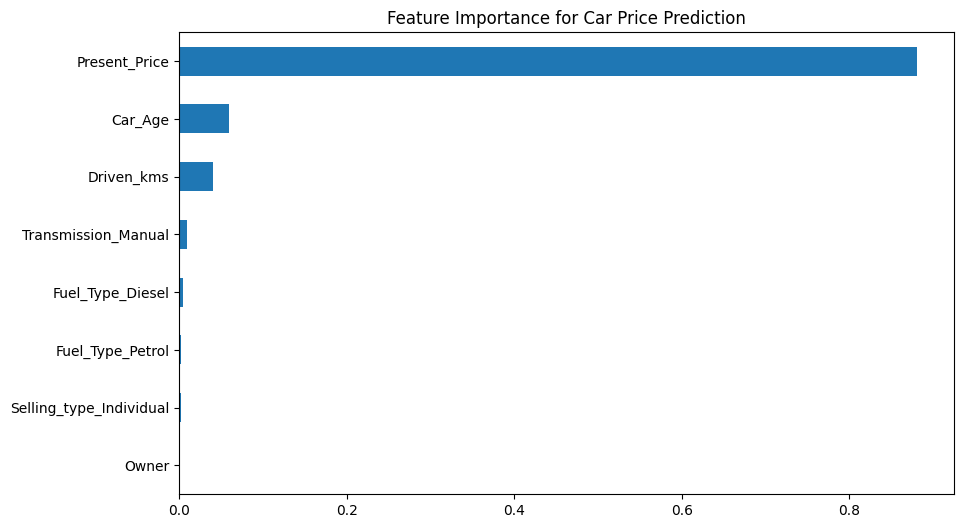

In [23]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance for Car Price Prediction")
plt.show()


In [24]:
# Example: 5-year-old Diesel car, manual transmission, 1 previous owner
sample = pd.DataFrame([{
    'Present_Price': 7.5,
    'Driven_kms': 40000,
    'Owner': 1,
    'Car_Age': 5,
    'Fuel_Type_Diesel': 1,
    'Fuel_Type_Petrol': 0,
    'Selling_type_Individual': 0,
    'Transmission_Manual': 1
}])

predicted_price = model.predict(sample)
print("Predicted Selling Price: ₹", round(predicted_price[0], 2))


Predicted Selling Price: ₹ 5.21
